**Project Description:**
Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual’s credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays. In this project, we will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.
The dataset used in this project is the Credit Card and Credit Card Label dataset

**Import Python Libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from pandas import DataFrame

**Loading Dataset**

In [2]:
##Loading Dataset
Creditcard_Details = pd.read_csv('/content/Credit_card.csv')

# Inspect data
Creditcard_Details

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [3]:
##Loading Second Dataset
Creditcard_label = pd.read_csv('/content/Credit_card_label.csv')

# Inspect data
Creditcard_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


**Merging Two Data sets**

In [4]:
Creditcard_Details = pd.read_csv('/content/Credit_card.csv')
Creditcard_label = pd.read_csv('/content/Credit_card_label.csv')

# using merge function by setting how='inner'
Creditcard_All_Details = pd.merge(Creditcard_Details, Creditcard_label, on='Ind_ID', how='inner')

# displaying result
Creditcard_All_Details

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [5]:
##we print the first five rows using df.head()
Creditcard_All_Details.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [6]:
Creditcard_All_Details.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


**Knowing the Data**
To understand our data better, we use handy pandas features df.info() and df.describe(). Let’s first print the information of the dataset by using df.info().


In [7]:
# dataframe information
Creditcard_All_Details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

From the output we get the following information about the data: Data has a total of 1458 entries i.e. approval or rejection data of 1458 credit card applications with a total of 19 columns including 18 feature variables and one output variable. From the output’s Dtype column, we see several features with Dtype as object (string or mixed). Machine learning (ML) algorithms require all feature variables to be of numeric data type. We discuss this issue in detail later in the analysis section. Let’s explore more details of our data using df.describe(). The output is shown below:

In [8]:
Creditcard_All_Details.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


In [9]:
Creditcard_All_Details.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


**Handling the missing values:**


In [10]:
# for each of the categorical columns, lets see the unique values
for i in Creditcard_All_Details.columns:
    #print(i)
    if Creditcard_All_Details[i].dtype==object:
        print(Creditcard_All_Details[i].unique())

['M' 'F' nan]
['Y' 'N']
['Y' 'N']
['Pensioner' 'Commercial associate' 'Working' 'State servant']
['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
[nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [11]:
Creditcard_All_Details.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [12]:
import numpy as np
Creditcard_All_Details_New = Creditcard_All_Details.replace('NaN',np.mean)
Creditcard_All_Details_New.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [13]:
Creditcard_All_Details.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [14]:
Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mean(), inplace=True)
Creditcard_All_Details_New.isnull().sum()

<ipython-input-14-4d85ab0195d0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mean(), inplace=True)


Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [15]:
Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mode(), inplace=True)
Creditcard_All_Details_New.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    487
Family_Members       0
label                0
dtype: int64

**Manipulating Data:**

In [16]:
#Iterate over each column of Creditcard_All_Details_New
for col in Creditcard_All_Details_New:
  if Creditcard_All_Details_New[col].dtype == 'object':
 #impute with the most frequent values
    Creditcard_All_Details_New = Creditcard_All_Details_New.fillna(Creditcard_All_Details_New[col].value_counts().index[0])
#Count the number if NaNs in the dataset and print the counts to verify
Creditcard_All_Details_New.isna()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
Creditcard_All_Details_New.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.00000,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,F,2,0


In [18]:
#Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mean(), inplace=True)
Creditcard_All_Details_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [19]:
Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mean(), inplace=True)
Creditcard_All_Details_New.isnull().sum()

<ipython-input-19-4d85ab0195d0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Creditcard_All_Details_New.fillna(Creditcard_All_Details_New.mean(), inplace=True)


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [20]:
Creditcard_All_Details_New.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,F,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1


**Pre-processing the data**
The missing values are now successfully handled
There is still some minor but essential data pre-processing needed before we proceed towards building our machine learning model. We are going to divide these remaining pre-processing steps into three main tasks:

Convert the non-numeric data into numeric.
Split the data into train and test sets.
Scale the feature values to a uniform range.
First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called label encoding.

In [21]:
Creditcard_All_Details_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1548 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1548 non-null   object 
 17  Family_Members

In [22]:
Creditcard_All_Details_New.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,F,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1


**Splitting the dataset into training and test sets**
We have successfully converted all the non-numeric values to numeric ones.

Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.

Also, features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as feature selection.

In [23]:
X=Creditcard_All_Details_New[['Ind_ID',	'GENDER',	'Car_Owner',	'Propert_Owner',	'CHILDREN',	'Annual_income',	'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type',	'Birthday_count',	'Employed_days',	'Mobile_phone',	'Work_Phone',	'Phone',	'EMAIL_ID',	'Type_Occupation',	'Family_Members']]
X

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Laborers,2
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,F,2
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2


In [24]:
y = Creditcard_All_Details_New[['label']]
y


,label
0,1
1,1
2,1
3,1
4,1
...,...
1543,0
1544,0
1545,0
1546,0


**Checking is outliers present in Annual_income column:**

<Axes: xlabel='Annual_income', ylabel='Count'>

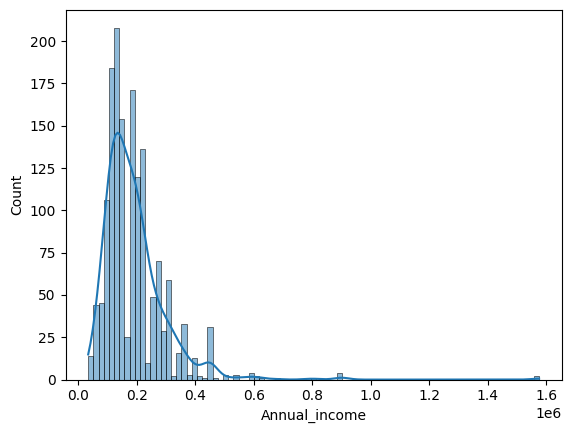

In [25]:
sns.histplot(x = X['Annual_income'],kde = True)

**Performing Log Transformation for 'Annual_income' column to get the Normalization of Skewed Data **


In [26]:
X['Annual_income'] = np.log(X['Annual_income'])
X

<ipython-input-26-ba63689f76b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Annual_income'] = np.log(X['Annual_income'])


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,12.100712,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Laborers,2
1,5009744,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
2,5009746,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,F,2
3,5009749,F,Y,N,0,12.162117,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
4,5009752,F,Y,N,0,12.660328,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,12.162117,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,12.323856,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,12.100712,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,12.506177,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2


**After performing Log Transformation again checking 'Annual_income' column:**

<Axes: xlabel='Annual_income', ylabel='Count'>

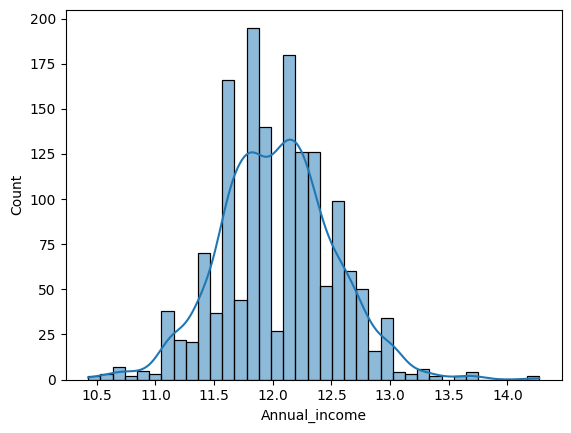

In [27]:
sns.histplot(x = X['Annual_income'],kde = True)

**Performing Dummy Encoding for Categorical data columns:**

In [28]:
X= pd.get_dummies(X,columns=['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','Type_Occupation'])
X

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,12.100712,-18772.000000,365243,1,0,0,0,2,...,1,0,0,0,0,0,0,0,0,0
1,5009744,0,12.660328,-13557.000000,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,5009746,0,12.660328,-16040.342071,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,5009749,0,12.162117,-13557.000000,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,5009752,0,12.660328,-13557.000000,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,12.162117,-11957.000000,-2182,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,12.323856,-10229.000000,-1209,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,12.100712,-13174.000000,-2477,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,0,12.506177,-15292.000000,-645,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [29]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y,
                                               test_size=0.30,
                                               random_state=0)

**Pre-processing the data**

The data is now split into two separate sets — train and test sets respectively. We are only left with one final pre-processing step of scaling before we can fit a machine learning model to the data.

Now, let’s try to understand what these scaled values mean in the real world. Let’s use CreditScore as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a CreditScore of 1 is the highest since we're rescaling all the values to the range of 0-1.

In [30]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)

**Fitting a Logistic Regression Model to the training set**

Essentially, predicting if a credit card application will be approved or not is a classification task. According to UCI, our dataset contains more instances that correspond to “Denied” status than instances corresponding to “Approved” status. Specifically, out of 1458 instances, there are 200 applications that got denied and 1258 applications that got approved.

This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.

**Which model should we pick? A question to ask is**: are the features that affect the credit card approval decision process correlated with each other? Although we can measure correlation, that is outside the scope of this notebook, so we’ll rely on our intuition that they indeed are correlated for now. Because of this correlation, we’ll take advantage of the fact that generalized linear models perform well in these cases. Let’s start our machine learning modeling with a Logistic Regression model (a generalized linear model).

sklearn package: This machine learning library includes numerous machine learning algorithms already builtin with certain parameters set as default parameters, so they work right out of the box.


In [31]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledXTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Making predictions and evaluating the performance of the model

But how well does our model perform?

We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model’s confusion matrix. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model’s performance from these aspects.

In [32]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledXTest)
#y_pred1 = logreg.predict(rescaledXTrain)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifiers: = ", logreg.score(rescaledXTest,yTest))
#print("Train: Accuracy = ", logreg.score(rescaledXTrain,yTrain))

# Print the confusion matrix of the logreg model
print(confusion_matrix(yTest,y_pred))

Accuracy of logistic regression classifiers: =  0.8924731182795699
[[414   0]
 [ 50   1]]


**Machine Learning Classifiers**
Now we have our dataset ready for building a machine learning-based classifier. There are several classification models that can be used for this task. In this analysis, we will build five different types of classification models namely Logistic Regression, Decision Tree, Gradient Boost, XGBoost and, K-Nearest Neighbors (KNN). These are the most popular models used for solving classification problems. All these models can be conveniently implemented using python’s scikit-learn package except for the XGBoost model, which is implemented using the XGBoost package.

a) Logistic Regression:

Before implementing logistic regression, we scale the feature variables of our dataset using sklearn’s **MinMaxScaler method**. We train the Logistic Regression model with standard parameters using the training dataset. The trained model is saved as logreg.



In [33]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledXTrain, yTrain)
logreg.fit(rescaledXTest, yTest)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

We evaluate the performance of our model using test dataset. We use the metric classification accuracy defined as the fraction of times model prediction matches the value of the target variable. For a detailed evaluation of our model, we look at the **confusion matrix.** The values in the diagonal of the confusion matrix denote the fraction of correct rejection (first-row first entry) or correct approval (second-row second entry) predictions by our classification model. Our logistic regression model has a classification accuracy of 89.0 %.

In [34]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledXTest)
y_pred1 = logreg.predict(rescaledXTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledXTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledXTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.896774193548387
Train: Accuracy =  0.8855032317636196


array([[414,   0],
       [ 48,   3]])

**b) Decision Tree**

The second model we try for our classification task is the Decision tree model. We have used sklearn’s **DecisionTreeClassifier algorithm** to build the model. We find the optimized value of hyperparameter max_depth by varying it between 1 and 10 in steps of 1. **max_depth** value decides the number of times a decision tree is allowed to split. In the plot of Accuracy vs Depth for train and test data, we see for max_depth =3 both train and test accuracy are the same. We choose this value for our model as it avoids a model that is either **overfitted or underfittted**. T**he final test accuracy score of our decision tree model is 88.5 %.**

1 Train score: 0.8855032317636196 Test score: 0.8903225806451613
2 Train score: 0.8873499538319483 Test score: 0.8924731182795699
3 Train score: 0.8901200369344414 Test score: 0.8903225806451613
4 Train score: 0.9030470914127424 Test score: 0.8817204301075269
5 Train score: 0.9132040627885504 Test score: 0.886021505376344
6 Train score: 0.9215143120960295 Test score: 0.875268817204301
7 Train score: 0.9289012003693444 Test score: 0.8817204301075269
8 Train score: 0.9335180055401662 Test score: 0.8817204301075269
9 Train score: 0.9372114496768237 Test score: 0.886021505376344


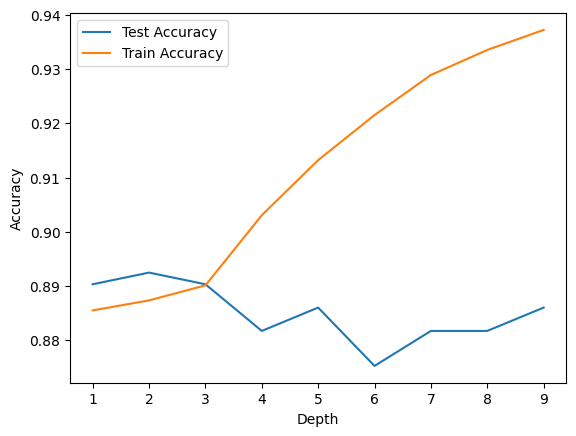

In [35]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):

    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(XTrain, yTrain)

    train_pred = dtc.predict(XTrain)
    #train_acc.append(score(train_pred, yTrain))

    test_pred = dtc.predict(XTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)])


df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

**c) Gradient Boost**

The third model we try for our classification task is the Gradient Boost. For the gradient boost, we use sklearn’s default hyperparameter value. It gives us an accuracy of 93.4% and 90.1% on train and test datasets respectively.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.9372114496768237 Test score: 0.8946236559139785


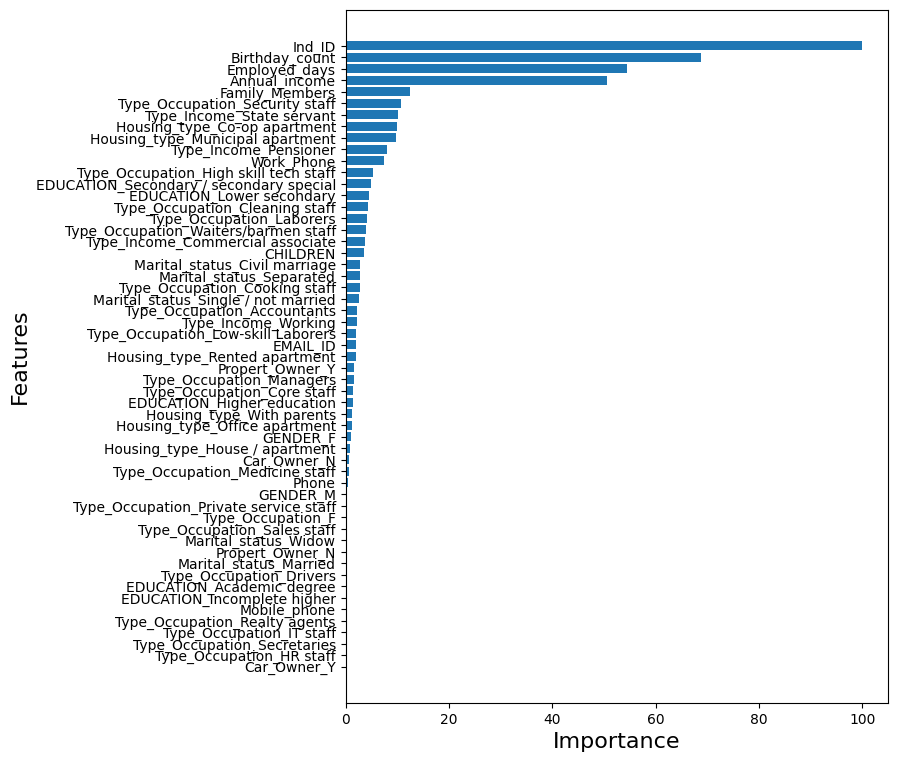

In [36]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(XTrain, yTrain)

train_predict = clf.predict(XTrain)
test_predict = clf.predict(XTest)


test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

**d) XGBoost**

The fourth model we try for our classification task is the XGBoost. We built this model using the **XGBClassifier** algorithm provided by the XGBoost package. Using the XGBoost model with default values for hyperparameters, **we obtained an accuracy of 92.2% on the test dataset.**

In [37]:
# fit model to training data
model = XGBClassifier()
model.fit(XTrain, yTrain)

train_predict = model.predict(XTrain)
test_predict = model.predict(XTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.9963065558633426 Test score: 0.9139784946236559


e) KNN

The fifth model we try for our classification task is the K-Nearest Neighbors (KNN). We have built the model using sklearn’s **KNeighborsClassifier** algorithm. We have optimized the hyperparameter n_neighbors by iterating through a range of values from n=2 to n=20 and comparing the accuracy scores. We select the value n_neighbors=10 as it avoids both overfitting and underfitting. With 10 neighbors, **the accuracy score on the test sample is 80%.**

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.9427516158818098 Test score: 0.8838709677419355
2 Train score: 0.9427516158818098 Test score: 0.8838709677419355
Train score: 0.925207756232687 Test score: 0.8516129032258064
3 Train score: 0.925207756232687 Test score: 0.8516129032258064


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.9039704524469068 Test score: 0.8731182795698925
4 Train score: 0.9039704524469068 Test score: 0.8731182795698925
Train score: 0.9030470914127424 Test score: 0.8688172043010752
5 Train score: 0.9030470914127424 Test score: 0.8688172043010752


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.8975069252077562 Test score: 0.8903225806451613
6 Train score: 0.8975069252077562 Test score: 0.8903225806451613
Train score: 0.8928901200369345 Test score: 0.8795698924731182
7 Train score: 0.8928901200369345 Test score: 0.8795698924731182


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.8928901200369345 Test score: 0.8838709677419355
8 Train score: 0.8928901200369345 Test score: 0.8838709677419355
Train score: 0.8910433979686058 Test score: 0.8795698924731182
9 Train score: 0.8910433979686058 Test score: 0.8795698924731182


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.8919667590027701 Test score: 0.8903225806451613
10 Train score: 0.8919667590027701 Test score: 0.8903225806451613
Train score: 0.8901200369344414 Test score: 0.8924731182795699
11 Train score: 0.8901200369344414 Test score: 0.8924731182795699


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.889196675900277 Test score: 0.8924731182795699
12 Train score: 0.889196675900277 Test score: 0.8924731182795699
Train score: 0.8864265927977839 Test score: 0.8924731182795699
13 Train score: 0.8864265927977839 Test score: 0.8924731182795699


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.8873499538319483 Test score: 0.8924731182795699
14 Train score: 0.8873499538319483 Test score: 0.8924731182795699
Train score: 0.8873499538319483 Test score: 0.8903225806451613
15 Train score: 0.8873499538319483 Test score: 0.8903225806451613


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.8901200369344414 Test score: 0.8924731182795699
16 Train score: 0.8901200369344414 Test score: 0.8924731182795699
Train score: 0.8882733148661126 Test score: 0.8903225806451613
17 Train score: 0.8882733148661126 Test score: 0.8903225806451613


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score: 0.889196675900277 Test score: 0.8903225806451613
18 Train score: 0.889196675900277 Test score: 0.8903225806451613
Train score: 0.8864265927977839 Test score: 0.8903225806451613
19 Train score: 0.8864265927977839 Test score: 0.8903225806451613


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


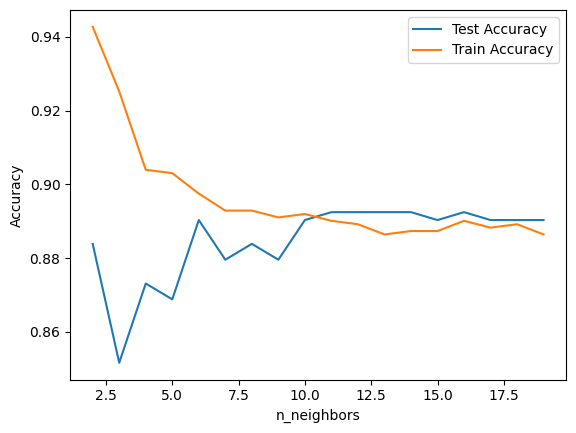

In [38]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(XTrain,yTrain)

    train_predict = knn.predict(XTrain)
    test_predict = knn.predict(XTest)

    test_acc = accuracy_score(yTest, test_predict)
    train_acc = accuracy_score(yTrain, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, yTrain),accuracy_score(test_predict, yTest)])


df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()

Conclusion:
We have tried five different classification models for our credit card approval prediction task. The train and test accuracy of the models is summarized above. We have obtained the best test data accuracy (89%) from the Logistic Regression classifier. The small difference in train and test accuracy scores indicates the absence of overfitting and underfitting.

**Model**  **Train Accuracy**  **Test Accuracy**


**Summary**
We built a machine learning-based classifier that predicts if a credit card application will get approved or not, based on the information provided in the application.
While building this credit card approval predictor, we learned about common preprocessing steps such as feature scaling, label encoding, and handling missing values.
We implemented five different machine learning models, optimized the hyperparameters, and evaluated the performance using the accuracy score and comparing the performance between train and test data.
We have used python’s machine learning libraries to implement machine learning algorithms.

In [39]:
Creditcard_All_Details_New.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,Laborers,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,F,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,F,2,1


Download the cleaned 'Creditcard_All_Details_New' file for performing SQL operation:

In [40]:
Creditcard_All_Details_New.to_csv("Creditcard_All_Details_New.csv")

In [41]:
ls

 Creditcard_All_Details_New.csv            Credit_card.csv         sample_data/
'Creditcard_All_Details_New for SQL.csv'   Credit_card_label.csv


In [42]:
Creditcard_All_Details_New.to_csv("Creditcard_All_Details_New.csv", index = False)
# importing file from a local folder
from google.colab import files
files.download('Creditcard_All_Details_New.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>